In [45]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

### Zastosowanie metody gradientowej na przykładzie funkcji Rosenbrock:
$$ f(x,y)=(x-1)^{2}+b(y-x^{2})^{2} $$

#### 1. Definicja funkcji Rosenbrock

In [36]:
b = 10;
f = lambda x,y: (x-1)**2 + b*(y-x**2)**2;

#### 2. Wykres 3D

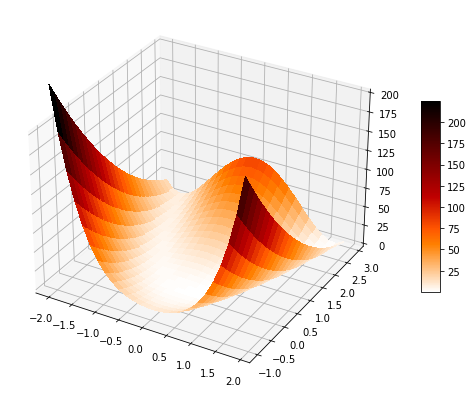

In [37]:
figRos = plt.figure(figsize=(12, 7))
axRos = figRos.gca(projection='3d')

X = np.arange(-2, 2, 0.15)
Y = np.arange(-1, 3, 0.15)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

surf = axRos.plot_surface(X, Y, Z, cmap=cm.gist_heat_r, linewidth=0, antialiased=False)
axRos.set_zlim(0, 200)
figRos.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

#### 3. Gradient funcji Rosenbrock
$$\nabla f=\left( \begin{gathered}2(x-1)-4b(y-x^{2})x\\ 2b(y-x^{2})\end{gathered} \right)  $$


In [38]:
df = lambda x,y: np.array([2*(x-1) - 4*b*(y - x**2)*x,2*b*(y-x**2)])

In [39]:
F = lambda X: f(X[0],X[1])
dF = lambda X: df(X[0],X[1])

#### 4. Punkt startowy

In [40]:
x0 = np.array([-1.4,1.1])
print(F(x0))
print(dF(x0))

13.155999999999993
[-52.96 -17.2 ]


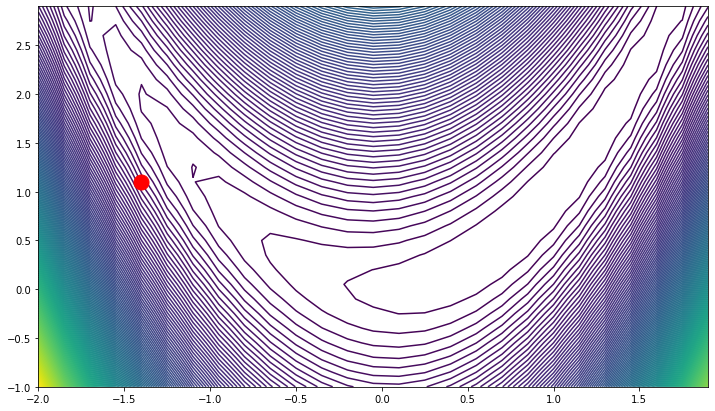

In [41]:
# Wykres 2D
plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z,200)
plt.plot([x0[0]],[x0[1]],marker='o',markersize=15, color ='r')

### 5. Iteracyjne wyznaczenie najbardziej stromego zbocza
Alpha - parametr określający krok optymalizacji. Warto sprawdzić działanie metody dla różnych wartości alpha.

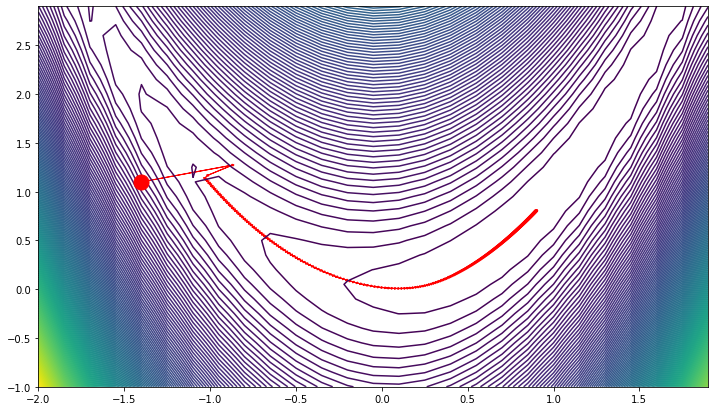

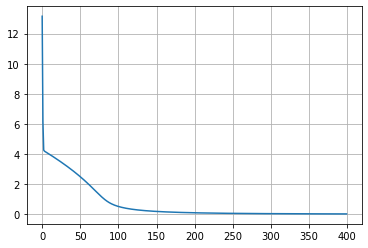

In [43]:
x0 = np.array([-1.4,1.1])

# Wykres ścieżki poszukiwania minimum
plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z,200)
plt.plot([x0[0]],[x0[1]],marker='o',markersize=15, color ='r')
alpha=0.01


wynik=[]
for i in range(400):
    fx = F(x0);
    gx = dF(x0);
    s = -gx;
    plt.arrow(x0[0],x0[1],alpha*s[0],alpha*s[1], head_width=0.02, head_length=0.01, fc='r', ec='r')
    x0=x0+s*alpha
    wynik.append(fx)

# Wykres wartośći funkcji 
fig2, ax2 = plt.subplots()
fig2.figsize=(12,7)
ax2.plot(wynik)
ax2.grid()
